# Problem 1 solution:

* First I have to scrap data or use manual or any other automated process to collect data of social media contents based on which dataset will be prepared. Dataset must be of relevant items based on which category, popularity, trends etc. can be measured. I shall focus on collecting post, like, reaction, comment, share, view these data. This is the first step of preprocessing data.

* Then I shall use SentimentIntensityAnalyzer library inheritted from vaderSentiment library function to analyze polarity of post/comment which will be essential for getting post popularity. For posts regarding only Image/Video data without any text in body, this field will be empty. This is the second step of preprocessing data. 

* Now I shall start preparing dataset. I shall at first prepare some labels according to scraped dataset post categories and create the dataset accordingly using these fields:

(1) post_categories 
(2) post_polarities 
(3) post_likes 
(4) post_reactions 
(5) comment_categories 
(6) comment_polarities 
(7) post_shares 
(8) post_views

* Here post_categories and comment_categories data will be mapped accordingly and fitting based on that, post_polarities and comment_polarities data will be gathered form vaderSentiment's SentimentIntensityAnalyzer library function's analyzer score process which was mentioned in the data preprocessing's second step and post_likes, post_reactions, post_shares, post_views data will be gained from scraping or any other manual or automated process which was mentioned in the data preprocessing's first step.

* Now I shall normalize dataset since some fields i.e. categories and polarities are not available for posts with only image/video without any text in body.

* Now I shall start model training. I shall choose Naive Bayes algorithm for featured classification and apply MultinomialNB for going through whole dataset neighbours. 

Thus after model training, model retraining, hyper-tuning, dataset enriching etc will be continuously repeated until getting a good testing accuracy and better model performance. This is in short, a detailed step by step scenario of the whole process.

# Problem 2 solution:

# Transfer learning(InceptionV3):

In [5]:
#importing gpu
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow 
config = ConfigProto()

#checking gpu function availability
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True

#session-configuration adjusting
session = InteractiveSession(config=config)

#checking tensorflow-gpu support
print(tensorflow.__version__)
print(len(tensorflow.config.list_physical_devices('GPU'))>0)

2.3.0
False


C:\Users\MEDINA TECH\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
#checking gpu status
!nvidia-smi

Sat Dec 10 20:25:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
#importing libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [99]:
#calling global varibles
IMAGE_SIZE = [256, 256]
TRAIN_PATH = 'F:/Selise_problem_set_Data_Scientist/dataset_256X256/train/'
TEST_PATH = 'F:/Selise_problem_set_Data_Scientist/dataset_256X256/test/'
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/bird4.jpg'

In [9]:
#Pretrained model structure fetching with custom dataset
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
#Avoiding pretrained data layers
for layer in inception.layers:
    layer.trainable = False

In [11]:
#Importing training dataset
folders = glob('F:/Selise_problem_set_Data_Scientist/dataset_256X256/train/*')

In [12]:
#Importing flattened structure as output layer
flatten = Flatten()(inception.output)

In [13]:
#Calling layers
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(len(folders), activation="softmax")(bboxHead)

In [14]:
#Fixing input, output layers args
model = Model(inputs=inception.input, outputs=bboxHead)

In [15]:
#Showing model status
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
#Model compiling
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
#Dataset augmentation
train_datagen = ImageDataGenerator(rescale = 1./225,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./225)

In [18]:
#Fetching trained data path
training_set = train_datagen.flow_from_directory(TRAIN_PATH,                                           
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6000 images belonging to 5 classes.


In [19]:
#Fetching test data path
test_set = test_datagen.flow_from_directory(TEST_PATH,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2000 images belonging to 5 classes.


In [44]:
#Model training
trained_model = model.fit(
  training_set,
  validation_data = test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
188/188 [==============================] - 463s 2s/step - loss: 0.2301 - accuracy: 0.9407 - val_loss: 0.1905 - val_accuracy: 0.9425
Epoch 2/10
188/188 [==============================] - 485s 3s/step - loss: 0.1633 - accuracy: 0.9528 - val_loss: 0.2992 - val_accuracy: 0.9300
Epoch 3/10
188/188 [==============================] - 499s 3s/step - loss: 0.1293 - accuracy: 0.9608 - val_loss: 0.3944 - val_accuracy: 0.8985
Epoch 4/10
188/188 [==============================] - 496s 3s/step - loss: 0.1007 - accuracy: 0.9678 - val_loss: 0.2306 - val_accuracy: 0.9330
Epoch 5/10
188/188 [==============================] - 496s 3s/step - loss: 0.0832 - accuracy: 0.9735 - val_loss: 0.3859 - val_accuracy: 0.9110
Epoch 6/10
188/188 [==============================] - 511s 3s/step - loss: 0.0980 - accuracy: 0.9698 - val_loss: 0.2334 - val_accuracy: 0.9445
Epoch 7/10
188/188 [==============================] - 502s 3s/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.1886 - val_accuracy: 0.9540

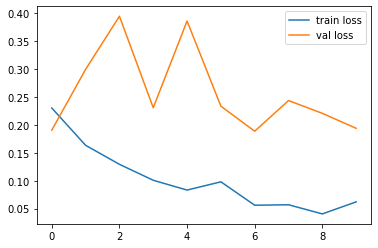

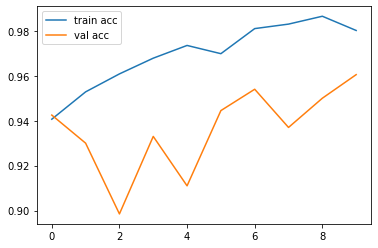

<Figure size 432x288 with 0 Axes>

In [45]:
#Model performance plotting
plt.plot(trained_model.history['loss'], label='train loss')
plt.plot(trained_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(trained_model.history['accuracy'], label='train acc')
plt.plot(trained_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
#Model saving
model.save('F:/Selise_problem_set_Data_Scientist/classifier.h5')

In [47]:
#Model performance on test dataset
y_pred = model.predict(test_set)

In [48]:
#Test peformance array
y_pred

array([[1.39226868e-12, 9.99815404e-01, 1.46769679e-07, 9.44721101e-09,
        1.84496865e-04],
       [9.99999046e-01, 8.34968716e-07, 6.21048612e-12, 2.80530547e-11,
        1.15750318e-07],
       [1.52970351e-05, 2.04539344e-10, 4.72254917e-12, 9.99984741e-01,
        1.44695695e-08],
       ...,
       [2.41479924e-04, 1.75542791e-05, 5.87137876e-08, 1.01202795e-05,
        9.99730766e-01],
       [8.61245780e-07, 3.03145640e-07, 1.38445271e-11, 1.30059474e-08,
        9.99998808e-01],
       [5.21381061e-13, 1.00000000e+00, 1.46513043e-12, 9.02679459e-11,
        9.83474746e-10]], dtype=float32)

In [49]:
#Calling best match array
y_pred = np.argmax(y_pred, axis=1)

In [50]:
#Showing best match array
y_pred

array([1, 0, 3, ..., 4, 4, 1], dtype=int64)

In [51]:
#Model loading
from tensorflow.keras.models import load_model
model=load_model('F:/Selise_problem_set_Data_Scientist/classifier.h5')

In [52]:
#Test image inputting
img=image.load_img(TEST_IMAGE, target_size=(256, 256))

In [53]:
#Test image to array conversion
img_arr=image.img_to_array(img)
img_arr

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [54]:
#Test image shape
img_arr.shape

(256, 256, 3)

In [55]:
#Test image floating point
img_arr=img_arr/225

In [56]:
#Test image dimension and preprocessing
img_arr=np.expand_dims(img_arr,axis=0)
img_data=preprocess_input(img_arr)
img_data.shape

(1, 256, 256, 3)

bird (1.0)
unrelated_image (1.0016e-06)
[[3.4988554e-09 9.9999905e-01 1.8737241e-09 1.4434576e-08 1.0015718e-06]]
probability:0.99999905
bird


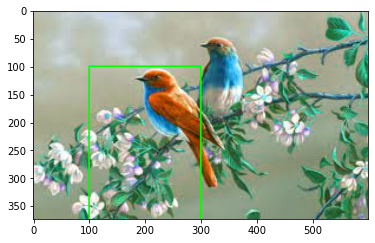

-1

In [9]:
#Model overall testing

#importing libraries
import cv2, imutils
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

#Global variables
model = load_model('F:/Selise_problem_set_Data_Scientist/classifier.h5')
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/bird4.jpg'

#test image processing
img=image.load_img(TEST_IMAGE,target_size=(256, 256))

#image conversion to array
img_arr=image.img_to_array(img)
img_arr
img_arr.shape

#image-array casting conversion
img_arr=img_arr/225

#image dimension adjusting
img_arr=np.expand_dims(img_arr,axis=0)

#model prediction testing
pred = model.predict(img_arr)

#data classes
classes = np.array(['berry', 'bird', 'dog', 'flower', 'unrelated_image'])

#data class probability detection
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])
#localization parameters calling
(startX, startY, endX, endY) = pred[:, 0], pred[:, 1], pred[:, 2], pred[:, 3]
#test image calling
test_image = cv2.imread(TEST_IMAGE)
#test image resizing
test_image = imutils.resize(test_image, width=600)
#test image adjusting
(h, w) = test_image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
#test image localization
output = cv2.rectangle(test_image, (startX+300, startY+300), (endX+100, endY+100), (0, 255, 0), 2)
#test image localized prediction
output = cv2.putText(test_image, classes[itemindex[1][0]], (startX+300, startY+300), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)
cv2.imshow("Output", test_image)
cv2.imwrite('F:/result_inception/det.jpg', test_image)
plt.imshow(output)
plt.show()
cv2.waitKey(0)

# Classifier overfitted or not?

Model is not overfitted because it can perfectly detect image data out of training set also. Besides, here training data accuracy and validation accuracy is in harmony.

# Convolutional neural network(CNN):

In [1]:
#importing gpu
import tensorflow 
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
#checking gpu function availability 
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
#session-configuration adjusting
session = InteractiveSession(config=config)
print(tensorflow.__version__)
print(len(tensorflow.config.list_physical_devices('GPU'))>0)

C:\Users\MEDINA TECH\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


2.3.0
False


In [2]:
#checking gpu status
!nvidia-smi

Sun Dec 11 22:57:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#importing libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import os, pickle
from os import listdir
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image
import cv2, imutils
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from glob import glob

In [4]:
#calling global varibles
img_width, img_height = 256, 256
#learning rate initialization
INIT_LR = 1e-3
image_size = 0
default_image_size = tuple((256, 256))
IMAGE_SIZE = [256, 256]
depth = 3
nb_train_samples = 6000  
nb_test_samples = 2000 
directory_root = 'F:/Selise_problem_set_Data_Scientist/dataset_256X256'

In [5]:
#image directory and label fixing 
#converting image to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir:
        # remove .DS_Store from list
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:
            # remove .DS_Store from list
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list:
                if single_plant_disease_image == ".DS_Store":
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".JPEG") == True or image_directory.endswith(".jpeg") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('F:/Selise_problem_set_Data_Scientist/classifier2.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

[INFO] Loading images ...
[INFO] Processing berry ...
[INFO] Processing bird ...
[INFO] Processing dog ...
[INFO] Processing flower ...
[INFO] Processing unrelated_image ...
[INFO] Processing berry ...
[INFO] Processing bird ...
[INFO] Processing dog ...
[INFO] Processing flower ...
[INFO] Processing unrelated_image ...
[INFO] Image loading completed
8000
['berry' 'bird' 'dog' 'flower' 'unrelated_image']


In [6]:
#setting-up milestones
epochs = 10
#localized model structure build-up 
inputShape = (img_height, img_width, depth)
#initialization of dimension change 
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, img_height, img_width)
    chanDim = 1
folders = glob('F:/Selise_problem_set_Data_Scientist/dataset_256X256/train/*')
#input layer calling 
inputs = Input(shape=(256, 256, 3))
bboxHead = inputs
bboxHead = Conv2D(32, (3, 3), padding="same", input_shape=inputShape)(bboxHead)
bboxHead = Activation('relu')(bboxHead)
bboxHead = BatchNormalization(axis=chanDim)(bboxHead)
bboxHead = MaxPooling2D(pool_size=(3, 3))(bboxHead)
bboxHead = Dropout(0.25)(bboxHead)
bboxHead = Conv2D(64, (3, 3), padding="same")(bboxHead)
bboxHead = Activation('relu')(bboxHead)
bboxHead = BatchNormalization(axis=chanDim)(bboxHead)
bboxHead = Conv2D(64, (3, 3), padding="same")(bboxHead)
bboxHead = Activation("relu")(bboxHead)
bboxHead = BatchNormalization(axis=chanDim)(bboxHead)
bboxHead = MaxPooling2D(pool_size=(2, 2))(bboxHead)
bboxHead = Dropout(0.25)(bboxHead)
bboxHead = Conv2D(128, (3, 3), padding="same")(bboxHead)
bboxHead = Activation("relu")(bboxHead)
bboxHead = BatchNormalization(axis=chanDim)(bboxHead)
bboxHead = Conv2D(128, (3, 3), padding="same")(bboxHead)
bboxHead = Activation("relu")(bboxHead)
bboxHead = BatchNormalization(axis=chanDim)(bboxHead)
bboxHead = MaxPooling2D(pool_size=(2, 2))(bboxHead)
bboxHead = Dropout(0.25)(bboxHead)
bboxHead = Flatten()(bboxHead)
bboxHead = Dense(1024)(bboxHead)
bboxHead = Activation("relu")(bboxHead)
bboxHead = BatchNormalization()(bboxHead)
bboxHead = Dropout(0.5)(bboxHead)
bboxHead = Dense(n_classes)(bboxHead)
bboxHead = Activation("softmax")(bboxHead)
#output layer calling
model = Model(inputs, bboxHead)
model.summary()
#optimizer calling
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / epochs)
#model compiling
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)       

In [7]:
#image augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 225,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    brightness_range=[0.2,1.2])
test_datagen = ImageDataGenerator(rescale=1. / 225)
#dataset calling
train = train_datagen.flow_from_directory('F:/Selise_problem_set_Data_Scientist/dataset_256X256/train/',
                                                    target_size=(img_width, img_height),
                                                    batch_size=32, class_mode='categorical')
test = test_datagen.flow_from_directory(
    'F:/Selise_problem_set_Data_Scientist/dataset_256X256/test/',
    target_size=(img_width, img_height),
    batch_size=32, class_mode='categorical')

Found 6000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


Epoch 1/10
188/188 [==============================] - 1123s 6s/step - loss: 1.9469 - accuracy: 0.3627 - val_loss: 1.5350 - val_accuracy: 0.3140
Epoch 2/10
188/188 [==============================] - 810s 4s/step - loss: 1.5146 - accuracy: 0.4515 - val_loss: 1.3200 - val_accuracy: 0.4120
Epoch 3/10
188/188 [==============================] - 851s 5s/step - loss: 1.3292 - accuracy: 0.5018 - val_loss: 1.0555 - val_accuracy: 0.5940
Epoch 4/10
188/188 [==============================] - 862s 5s/step - loss: 1.2507 - accuracy: 0.5278 - val_loss: 1.1968 - val_accuracy: 0.5570
Epoch 5/10
188/188 [==============================] - 855s 5s/step - loss: 1.1248 - accuracy: 0.5635 - val_loss: 1.4805 - val_accuracy: 0.4935
Epoch 6/10
188/188 [==============================] - 843s 4s/step - loss: 1.0798 - accuracy: 0.5940 - val_loss: 1.3566 - val_accuracy: 0.5390
Epoch 7/10
188/188 [==============================] - 831s 4s/step - loss: 1.0024 - accuracy: 0.6182 - val_loss: 0.9043 - val_accuracy: 0.666

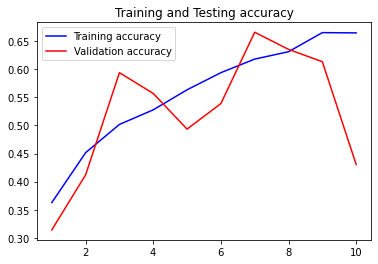

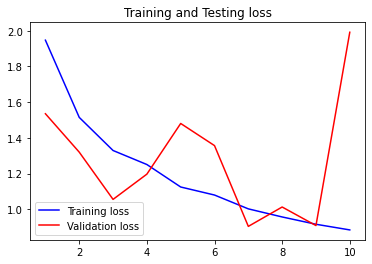

[0.36266666650772095, 0.4514999985694885, 0.5018333196640015, 0.5278333425521851, 0.5634999871253967, 0.593999981880188, 0.6181666851043701, 0.6313333511352539, 0.6653333306312561, 0.6648333072662354] [0.3140000104904175, 0.41200000047683716, 0.593999981880188, 0.5569999814033508, 0.4934999942779541, 0.5389999747276306, 0.6660000085830688, 0.6355000138282776, 0.6134999990463257, 0.43050000071525574] [1.9469038248062134, 1.5145963430404663, 1.3292003870010376, 1.2506858110427856, 1.1248162984848022, 1.079830527305603, 1.0023664236068726, 0.9570974111557007, 0.9161575436592102, 0.8845107555389404] [1.5349996089935303, 1.3199665546417236, 1.055456519126892, 1.1968462467193604, 1.4805207252502441, 1.3565709590911865, 0.9042837023735046, 1.0127702951431274, 0.9089705348014832, 1.991343379020691]


In [8]:
#model training
history = model.fit(train,
                    steps_per_epoch=len(train),
                    epochs=epochs, validation_data=test,
                    validation_steps=len(test))
#model saving
model.save('F:/Selise_problem_set_Data_Scientist/classifier2.h5')
#model status checking
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Testing loss')
plt.legend()
plt.show()
print(accuracy, val_acc, loss, val_loss)

flower (0.78489)
unrelated_image (0.14566)
[[0.03388038 0.02922652 0.00634439 0.7848905  0.14565818]]
probability:0.7848905
flower


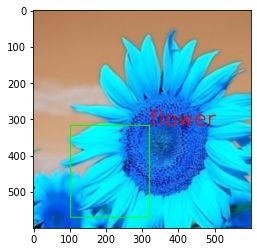

-1

In [30]:
#model validation
#importing libraries
import cv2, imutils
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
#model loading
model = load_model('F:/Selise_problem_set_Data_Scientist/classifier2.h5')
#test image calling
TEST_IMAGE = 'E:/Official purpose/2021/Sprint - 26/Crop images/flower9.jpg'
#test image processing
img=image.load_img(TEST_IMAGE,target_size=(256, 256))
#image conversion to array
img_arr=image.img_to_array(img)
img_arr
img_arr.shape
#image-array casting conversion
img_arr=img_arr/225
#image dimension adjusting
img_arr=np.expand_dims(img_arr,axis=0)
#model prediction testing
pred = model.predict(img_arr)
#data classes
classes = np.array(['berry', 'bird', 'dog', 'flower', 'unrelated_image'])
#data class probability detection
top_2 = np.argsort(pred[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.5})".format(pred[0][top_2[i]]))
print(pred)
itemindex = np.where(pred == np.max(pred))
print("probability:" + str(np.max(pred)) + "\n" + classes[itemindex[1][0]])
#localization parameters calling
(startX, startY, endX, endY) = pred[:, 0], pred[:, 1], pred[:, 2], pred[:, 3]
#test image calling
test_image = cv2.imread(TEST_IMAGE)
#test image resizing
test_image = imutils.resize(test_image, width=600)
#test image adjusting
(h, w) = test_image.shape[:2]
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
#test image localization
output = cv2.rectangle(test_image, (startX+300, startY+300), (endX+100, endY+100), (0, 255, 0), 2)
#test image localized prediction
output = cv2.putText(test_image, classes[itemindex[1][0]], (startX+300, startY+300), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)
cv2.imshow("Output", test_image)
cv2.imwrite('F:/result_cnn/det.jpg', test_image)
plt.imshow(output)
plt.show()
cv2.waitKey(0)

# Ensemble learning:

In [37]:
#importing libraries
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import concatenate, Dense, Average
import numpy as np
import tensorflow

In [38]:
np.set_printoptions(suppress=True)

In [49]:
#importing two models
model1 = load_model("F:/Selise_problem_set_Data_Scientist/classifier.h5", compile=False)
model2 = load_model("F:/Selise_problem_set_Data_Scientist/classifier2.h5", compile=False)

In [50]:
#combining two models
models = [model1, model2]
model_input = tensorflow.keras.Input(shape=(256, 256, 3))
model_outputs = [model(model_input) for model in models]

In [ ]:
#ensembling two models
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output)  
ensemble_model.save('F:/Selise_problem_set_Data_Scientist/ensembled_model.h5')

# Problem 3 solution:

In [52]:
class Earth :
    dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    @staticmethod
    def  check( x,  y,  n,  m) :
        return x >= 0 and y >= 0 and x < n and y < m
    @staticmethod
    def dfs( grid,  vis,  x,  y,  n,  m) :
        if (not Earth.check(x, y, n, m) or grid[x][y] == '0' or vis[x][y] == True) :
            return
        vis[x][y] = True
        i = 0
        while (i < 4) :
            x1 = x + Earth.dir[i][0]
            y1 = y + Earth.dir[i][1]
            Earth.dfs(grid, vis, x1, y1, n, m)
            i += 1
    @staticmethod
    def  numIslands( grid) :
        ans = 0
        n = len(grid)
        m = len(grid[0])
        vis = [[False] * (m) for _ in range(n)]
        i = 0
        while (i < n) :
            j = 0
            while (j < m) :
                if (vis[i][j] == False and grid[i][j] == '1') :
                    ans += 1
                    Earth.dfs(grid, vis, i, j, n, m)
                j += 1
            i += 1
        return ans
    @staticmethod
    def main( args) :
        grid = [['1', '1', '0', '0', '0'], ['1', '1', '0', '0', '0'], ['0', '0', '1', '0', '0'], ['0', '0', '0', '1', '1']]
        print(Earth.numIslands(grid))
    

if __name__=="__main__":
    Earth.main([])

3
